In [1]:
import pandas as pd

In [2]:
#Import the cleaned data

df = pd.read_csv('../parsed_data/cleaned_data/articles.A-B.xml.tar.gz_cleaned.csv', usecols={'journal','PMCID','ack_present'})
df2 = pd.read_csv('../parsed_data/cleaned_data/articles.C-H.xml.tar.gz_cleaned.csv', usecols={'journal','PMCID','ack_present'})
df3 = pd.read_csv('../parsed_data/cleaned_data/articles.I-N.xml.tar.gz_cleaned.csv', usecols={'journal','PMCID','ack_present'})
df4 = pd.read_csv('../parsed_data/cleaned_data/articles.O-Z.xml.tar.gz_cleaned.csv', usecols={'journal','PMCID','ack_present'})

In [3]:
#Concatenate the datasets
merged = pd.concat([df, df2,df3,df4], ignore_index=True).dropna(subset=['PMCID'])


In [4]:
#Set the data type of the PMCIDs to integer

merged['PMCID'] = merged['PMCID'].astype(int)


In [5]:
#Drop any duplicates from the full-text article datasets
merged = merged.drop_duplicates(subset=["PMCID"]).set_index('PMCID')


In [6]:
pub_data = pd.read_csv('../source_data/PMC_info-iSearch_-_Publications-export_2018-09-04-20-53-47.csv')

/home/ubuntu/.pyenv/versions/3.6.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,9,11,26,27,39,40,41,42,43,44,45,46,47,49,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#Cleaning the iSearch PMCIDs to remove "PMC", bad IDs, non-numeric numbers, and duplicates
pub_data['PMCID'] = pub_data['PMCID'].str[3:]
pub_data['PMCID'] = pub_data['PMCID'].str.split(pat=".", expand=True)[0]
pub_data = pub_data[pub_data['PMCID'].str.isnumeric() == True]
pub_data['PMCID'] = pub_data['PMCID'].astype(int)
pub_data = pub_data.drop_duplicates(subset=["PMCID"]).set_index("PMCID")

#Compare the indexes from both datasets and only keep the ones that match
idx = pub_data.index.isin(merged.index)
pub_data = pub_data[idx]

merge_cols = ['Pub Year', 'MeSH Keywords', 'MeSH Extracted','RCR','Journal Name']
#Merge the columns that we care about from the iSearch dataset to the full-text article dataset
for col in merge_cols:
    merged[col] = pub_data[col]
    
print(merged)

                        journal  ack_present  Pub Year  \
PMCID                                                    
4804230      20_Century_Br_Hist        False    2015.0   
5905639      20_Century_Br_Hist        False    2017.0   
5954787            3D_Print_Med        False    2017.0   
5954788            3D_Print_Med        False    2017.0   
5954789            3D_Print_Med        False    2017.0   
5954790            3D_Print_Med        False    2017.0   
5954791            3D_Print_Med        False    2018.0   
5954792            3D_Print_Med        False    2018.0   
5954793            3D_Print_Med        False    2017.0   
5954794            3D_Print_Med        False    2018.0   
5954795            3D_Print_Med        False    2018.0   
5954796            3D_Print_Med        False    2017.0   
5954797            3D_Print_Med        False    2017.0   
5954798            3D_Print_Med        False    2017.0   
5954799            3D_Print_Med        False    2017.0   
5970151       

In [8]:
import pylab as plt
import seaborn as sns

years_orig = pub_data['Pub Year'].value_counts(sort=False, ascending=True)

years_orig = years_orig[years_orig.index <= 2017]
years_orig = years_orig[years_orig.index >= 1980]

plt.figure(figsize=[10,6])

plt.ylim(-10, 450000)
plt.plot(years_orig, marker='o')

sns.despine()

plt.show()

<Figure size 1000x600 with 1 Axes>

1980.0        18
1981.0        17
1982.0        21
1983.0        20
1984.0        24
1985.0        16
1986.0        31
1987.0        34
1988.0        38
1989.0        57
1990.0        66
1991.0        50
1992.0        53
1993.0        55
1994.0        43
1995.0        83
1996.0       118
1997.0      1060
1998.0      1071
1999.0      1038
2000.0      1250
2001.0      1667
2002.0      2635
2003.0      3404
2004.0      4788
2005.0      8153
2006.0     11603
2007.0     17052
2008.0     27543
2009.0     32978
2010.0     35899
2011.0     52099
2012.0     74999
2013.0     95090
2014.0    123475
2015.0    160566
2016.0    183740
2017.0    203825
Name: Pub Year, dtype: int64
1980.0     1301
1981.0     1478
1982.0     1518
1983.0     1743
1984.0     1660
1985.0     1695
1986.0     1744
1987.0     1752
1988.0     1880
1989.0     2226
1990.0     2328
1991.0     2410
1992.0     2323
1993.0     2751
1994.0     2983
1995.0     2957
1996.0     3156
1997.0     2350
1998.0     2508
1999.0     2550
2000.

AttributeError: module 'seaborn' has no attribute 'plt'

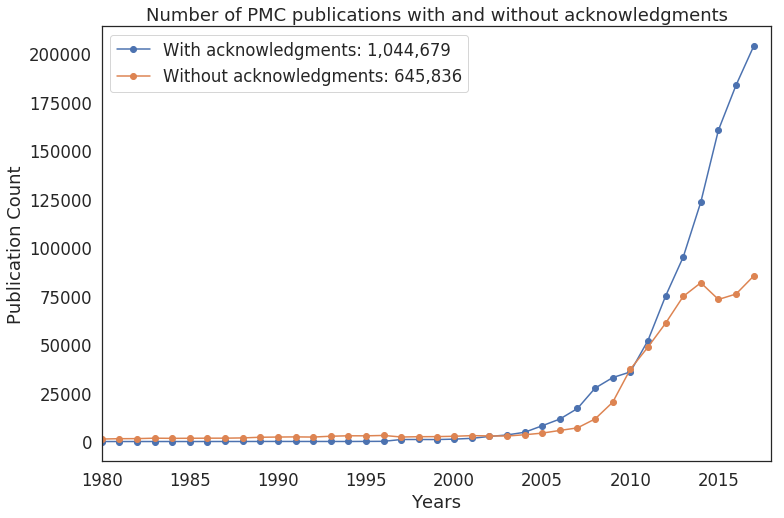

In [9]:
#Split the datasets into those that have an an acknowledgments and those that don't and then plot the data


ack_present = merged[merged['ack_present'] == False]

ack_absent = merged[merged['ack_present'] == True]

years_present = ack_present['Pub Year'].value_counts(sort=False, ascending=True)
years_present = years_present[years_present.index <= 2017]
years_present = years_present[years_present.index >= 1980]



years_absent = ack_absent['Pub Year'].value_counts(sort=False, ascending=True)
years_absent = years_absent[years_absent.index <= 2017]
years_absent = years_absent[years_absent.index >= 1980]

print(years_present)

print(years_absent)

plt.figure(figsize=[12,8])

sns.set(font='sans-serif', font_scale=1.5,style='white')

plt.xlim(1980, 2018)
plt.xlabel('Years')
plt.ylabel('Publication Count')
plt.title('Number of PMC publications with and without acknowledgments')



plt.plot(years_present, marker='o', label=f'With acknowledgments: {years_present.sum():,}')
plt.plot(years_absent, marker='o', label=f'Without acknowledgments: {years_absent.sum():,}')

plt.legend(loc='upper left')

sns.plt.ylim(-10, 250000)
sns.despine()
plt.tight_layout()


plt.show()
